In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#New York listings
df = pd.read_csv('listings-2.csv')

/Users/OwenPeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.price = df.price.map(lambda x: x.replace("$", ''))
df.price = df.price.map(lambda x: x.replace(",", ''))
df.price = df.price.map(lambda x: float(x))

In [145]:
#can't do too  computationally expensive
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=NY_cont.dropna()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.767
Model:                              OLS   Adj. R-squared:                  0.767
Method:                   Least Squares   F-statistic:                     6319.
Date:                  Mon, 13 Jan 2020   Prob (F-statistic):               0.00
Time:                          17:37:48   Log-Likelihood:            -1.0959e+05
No. Observations:                 38461   AIC:                         2.192e+05
Df Residuals:                     38440   BIC:                         2.194e+05
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.3873      0.354    -15.218      0.000      -6.081      -4.693
host_listings_count             0.0029      0.000      6.779      0.000       0.002       0.004
accommodates                   -0.0050      0.018     -0.270      0.787      -0.041       0.031
bathrooms                       0.1596      0.057      2.820      0.005       0.049       0.271
bedrooms                        0.0726      0.042      1.741      0.082      -0.009       0.154
beds                           -0.0427      0.030     -1.442      0.149      -0.101       0.015
price                           0.0002   9.29e-05      2.341      0.019    3.54e-05       0.000
availability_365               -0.0007      0.000     -4.200      0.000      -0.001      -0.000
minimum_minimum_nights          0.0028      0.002      1.143      0.253      -0.002       0.008
maximum_minimum_nights          0.0029      0.006      0.516      0.606      -0.008       0.014
minimum_maximum_nights       -5.42e-07   2.77e-07     -1.958      0.050   -1.08e-06    4.32e-10
maximum_maximum_nights      -1.317e-08   6.48e-09     -2.033      0.042   -2.59e-08   -4.76e-10
minimum_nights_avg_ntm          0.0003      0.007      0.039      0.969      -0.013       0.014
maximum_nights_avg_ntm       5.558e-07   2.83e-07      1.963      0.050    7.81e-10    1.11e-06
review_scores_accuracy          2.3741      0.040     59.282      0.000       2.296       2.453
review_scores_cleanliness       2.2565      0.027     83.162      0.000       2.203       2.310
review_scores_checkin           0.6139      0.042     14.737      0.000       0.532       0.696
review_scores_communication     1.9545      0.043     45.684      0.000       1.871       2.038
review_scores_location          0.5110      0.033     15.396      0.000       0.446       0.576
review_scores_value             2.7309      0.036     75.430      0.000       2.660       2.802
reviews_per_month              -0.1723      0.013    -13.222      0.000      -0.198      -0.147
==============================================================================
Omnibus:                    12263.423   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272639.752
Skew:                          -1.009   Prob(JB):                         0.00
Kurtosis:                      15.886   Cond. No.                     7.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
outcome = 'review_scores_rating'
x_col = list(df_c.columns)
remove = ['id','listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered',
'neighborhood_overview','notes','transit','access','interaction','house_rules','thumbnail_url','medium_url',
 'picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_location','host_about',
 'host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url',
 'host_picture_url','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
x_cols = [i for i in x_col if i not in remove] 


NameError: name 'df_c' is not defined

In [120]:
df['bed_type'].value_counts()

Real_Bed         48060
Futon              273
Pull-out_Sofa      228
Airbed             158
Couch               67
Name: bed_type, dtype: int64

In [319]:
# google how to use apply
df['host_is_superhost'] = df.host_is_superhost.apply(lambda x: 0 if x  == 'f' else 1)


In [320]:
df.host_is_superhost.value_counts()

0    40225
1    10374
Name: host_is_superhost, dtype: int64

In [355]:
df_c.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'availability_365', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'Aparthotel', 'Apartment', 'Barn', 'Bed_and_breakfast', 'Boat',
       'Boutique_hotel', 'Bungalow', 'Bus', 'Cabin', 'Camper/RV',
       'Casa_particular_(Cuba)', 'Castle', 'Cave', 'Condominium', 'Cottage',
       'Dome_house', 'Dorm', 'Earth_house', 'Farm_stay', 'Guest_suite',
       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'Island', 'Loft',
       'Other', 'Resort', 'Serviced_apartment', 'Tent', 'Tiny_house',
       'Townhouse', 'Villa', 'Yurt', 'Entire_h

In [358]:
prop_dum = pd.get_dummies(df['property_type'], drop_first=False)

In [328]:
df2.room_type.value_counts()

Entire_home/apt    25414
Private_room       22159
Shared_room         1213
Name: room_type, dtype: int64

In [329]:
room_dum = pd.get_dummies(df['room_type'], drop_first=False)

In [330]:
bed_dum = pd.get_dummies(df['bed_type'], drop_first=False)

In [336]:
bor_dum = pd.get_dummies(df['neighbourhood_group_cleansed'],prefix = 'borough', drop_first=False)
bor_dum

,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
50594,1,0,0,0,0
50595,0,0,0,1,0
50596,1,0,0,0,0
50597,0,1,0,0,0


In [164]:
df2.bed_type.value_counts()

Real_Bed         48060
Futon              273
Pull_out_Sofa      228
Airbed             158
Couch               67
Name: bed_type, dtype: int64

In [373]:
df_c = pd.concat([NY_cont, prop_dum, room_dum, bed_dum, bor_dum], axis=1)

In [196]:
df_c.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'Other', 'Townhouse', 'Entire_home/apt', 'Private_room', 'Shared_room',
       'Airbed', 'Couch', 'Futon', 'Pull_out_Sofa', 'Real_Bed'],
      dtype='object', length=121)

In [197]:
df_c.shape

(48786, 121)

Real_Bed         48840
Futon              278
Pull_out_Sofa      232
Airbed             158
Couch               67
Name: bed_type, dtype: int64

In [386]:
df = df[df['property_type'].isin(['Apartment','House', 'Townhouse', 'Condominium','Loft', 'Guest_suite', 'Boutique_hotel','Other']) ]

In [387]:
df.property_type = df.property_type.map(lambda x: x.replace(" ","_"))

In [322]:
df.room_type = df.room_type.map(lambda x: x.replace(" ","_"))
df.room_type = df.room_type.map(lambda x: x.replace("/","_"))

In [323]:
df.bed_type = df.bed_type.map(lambda x: x.replace(" ","_"))
df.bed_type = df.bed_type.map(lambda x: x.replace("-","_"))

In [325]:
df.neighbourhood_group_cleansed = df.neighbourhood_group_cleansed.map(lambda x: x.replace(" ","_"))

In [237]:
#reviews per month data, low r^2 but need to add more variables
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     155.2
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:44:32   Log-Likelihood:                -70191.
No. Observations:               37593   AIC:                         1.404e+05
Df Residuals:                   37561   BIC:                         1.407e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.0830      0.090    -12.041      0.000      -1.259      -0.907
host_listings_count            -0.0016      0.000     -9.713      0.000      -0.002      -0.001
accommodates                    0.1831      0.008     23.534      0.000       0.168       0.198
bathrooms                      -0.2011      0.022     -9.011      0.000      -0.245      -0.157
bedrooms                       -0.1807      0.016    -11.271      0.000      -0.212      -0.149
beds                            0.0456      0.011      3.985      0.000       0.023       0.068
price                          -0.0004   4.57e-05     -9.739      0.000      -0.001      -0.000
availability_365                0.0022   6.41e-05     33.743      0.000       0.002       0.002
minimum_minimum_nights         -0.0102      0.001    -10.993      0.000      -0.012      -0.008
maximum_minimum_nights          0.0017      0.002      0.772      0.440      -0.003       0.006
minimum_maximum_nights         -0.0005      0.000     -1.097      0.273      -0.001       0.000
maximum_maximum_nights          0.0072      0.002      3.536      0.000       0.003       0.011
minimum_nights_avg_ntm         -0.0026      0.003     -0.984      0.325      -0.008       0.003
maximum_nights_avg_ntm         -0.0067      0.002     -2.947      0.003      -0.011      -0.002
review_scores_rating           -0.0233      0.002    -11.991      0.000      -0.027      -0.019
review_scores_accuracy          0.1028      0.016      6.425      0.000       0.071       0.134
review_scores_cleanliness       0.1867      0.011     16.656      0.000       0.165       0.209
review_scores_checkin           0.0651      0.016      4.090      0.000       0.034       0.096
review_scores_communication     0.0234      0.017      1.384      0.166      -0.010       0.057
review_scores_location          0.0923      0.013      7.237      0.000       0.067       0.117
review_scores_value             0.0396      0.015      2.660      0.008       0.010       0.069
Apartment                      -0.1571      0.035     -4.430      0.000      -0.227      -0.088
Condominium                    -0.0217      0.051     -0.424      0.672      -0.122       0.079
House                           0.2290      0.042      5.487      0.000       0.147       0.311
Loft                           -0.3338      0.052     -6.443      0.000      -0.435      -0.232
Other                          -1.0092      0.165     -6.120      0.000      -1.332      -0.686
Townhouse                       0.2098      0.050      4.213      0.000       0.112       0.307
Entire_home_apt                -0.6046      0.038    -15.999      0.000      -0.679      -0.531
Private_room                   -0.2313      0.036     -6.475      0.000      -0.301      -0.161
Shared_room

In [214]:
df_c.isna().describe()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Other,Townhouse,Entire_home_apt,Private_room,Shared_room,Airbed,Couch,Futon,Pull_out_Sofa,Real_Bed
count,48786,48786,48786,48786,48786,48786,48786,48786,48786,48786,...,48786,48786,48786,48786,48786,48786,48786,48786,48786,48786
unique,1,1,1,1,2,2,2,2,1,2,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,48786,48786,48786,48786,48769,46636,34982,47794,48786,31968,...,48786,48786,48786,48786,48786,48786,48786,48786,48786,48786


In [259]:
#added in boro data increased R^2 a little
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     147.0
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:55:05   Log-Likelihood:                -70043.
No. Observations:               37593   AIC:                         1.402e+05
Df Residuals:                   37557   BIC:                         1.405e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9415      0.081    -11.637      0.000      -1.100      -0.783
host_listings_count            -0.0016      0.000     -9.719      0.000      -0.002      -0.001
accommodates                    0.1800      0.008     23.204      0.000       0.165       0.195
bathrooms                      -0.1710      0.022     -7.664      0.000      -0.215      -0.127
bedrooms                       -0.1759      0.016    -10.983      0.000      -0.207      -0.145
beds                            0.0439      0.011      3.850      0.000       0.022       0.066
price                          -0.0004   4.61e-05     -9.099      0.000      -0.001      -0.000
availability_365                0.0021   6.41e-05     32.527      0.000       0.002       0.002
minimum_minimum_nights         -0.0100      0.001    -10.911      0.000      -0.012      -0.008
maximum_minimum_nights          0.0019      0.002      0.872      0.383      -0.002       0.006
minimum_maximum_nights         -0.0005      0.000     -1.095      0.274      -0.001       0.000
maximum_maximum_nights          0.0071      0.002      3.489      0.000       0.003       0.011
minimum_nights_avg_ntm         -0.0028      0.003     -1.063      0.288      -0.008       0.002
maximum_nights_avg_ntm         -0.0066      0.002     -2.906      0.004      -0.011      -0.002
review_scores_rating           -0.0229      0.002    -11.828      0.000      -0.027      -0.019
review_scores_accuracy          0.1061      0.016      6.654      0.000       0.075       0.137
review_scores_cleanliness       0.1793      0.011     16.039      0.000       0.157       0.201
review_scores_checkin           0.0623      0.016      3.926      0.000       0.031       0.093
review_scores_communication     0.0271      0.017      1.607      0.108      -0.006       0.060
review_scores_location          0.0905      0.013      7.020      0.000       0.065       0.116
review_scores_value             0.0403      0.015      2.707      0.007       0.011       0.069
Apartment                      -0.1044      0.035     -2.955      0.003      -0.174      -0.035
Condominium                     0.0046      0.051      0.091      0.927      -0.095       0.104
House                           0.1440      0.042      3.437      0.001       0.062       0.226
Loft                           -0.2415      0.052     -4.680      0.000      -0.343      -0.140
Other                          -0.9726      0.164     -5.934      0.000      -1.294      -0.651
Townhouse                       0.2284      0.049      4.626      0.000       0.132       0.325
Entire_home_apt                -0.5402      0.035    -15.285      0.000      -0.609      -0.471
Private_room                   -0.1890      0.033     -5.682      0.000      -0.254      -0.124
Shared_room

In [268]:
#High R^2 for ratings, but haven't removed covariant data
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.764
Model:                              OLS   Adj. R-squared:                  0.764
Method:                   Least Squares   F-statistic:                     3475.
Date:                  Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                          10:57:54   Log-Likelihood:            -1.0690e+05
No. Observations:                 37593   AIC:                         2.139e+05
Df Residuals:                     37557   BIC:                         2.142e+05
Df Model:                            35                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.8513      0.216    -13.230      0.000      -3.274      -2.429
host_listings_count             0.0027      0.000      6.336      0.000       0.002       0.004
accommodates                   -0.0683      0.021     -3.283      0.001      -0.109      -0.028
bathrooms                       0.1879      0.060      3.157      0.002       0.071       0.305
bedrooms                        0.0884      0.043      2.067      0.039       0.005       0.172
beds                           -0.0108      0.030     -0.356      0.722      -0.070       0.049
price                           0.0005      0.000      4.207      0.000       0.000       0.001
availability_365               -0.0005      0.000     -2.938      0.003      -0.001      -0.000
minimum_minimum_nights          0.0020      0.002      0.814      0.416      -0.003       0.007
maximum_minimum_nights          0.0048      0.006      0.829      0.407      -0.006       0.016
minimum_maximum_nights          0.0012      0.001      1.042      0.297      -0.001       0.003
maximum_maximum_nights          0.0059      0.005      1.092      0.275      -0.005       0.016
minimum_nights_avg_ntm         -0.0021      0.007     -0.291      0.771      -0.016       0.012
maximum_nights_avg_ntm         -0.0071      0.006     -1.163      0.245      -0.019       0.005
review_scores_accuracy          2.2945      0.041     56.165      0.000       2.214       2.375
review_scores_cleanliness       2.2852      0.027     83.190      0.000       2.231       2.339
review_scores_checkin           0.6985      0.042     16.578      0.000       0.616       0.781
review_scores_communication     1.9131      0.044     43.655      0.000       1.827       1.999
review_scores_location          0.4772      0.034     13.911      0.000       0.410       0.544
review_scores_value             2.7230      0.037     73.459      0.000       2.650       2.796
reviews_per_month              -0.1624      0.014    -11.828      0.000      -0.189      -0.135
Apartment                      -0.5967      0.094     -6.340      0.000      -0.781      -0.412
Condominium                    -0.2215      0.135     -1.636      0.102      -0.487       0.044
House                          -0.8703      0.112     -7.801      0.000      -1.089      -0.652
Loft                           -0.0584      0.138     -0.424      0.671      -0.328       0.211
Other                          -0.3801      0.437     -0.870      0.384      -1.237       0.476
Townhouse                      -0.7243      0.132     -5.503      0.000      -0.982      -0.466
Entire_home_apt                -0.8407      0.094     -8.906      0.000      -1.026      -0.656
Private_room                   -1.0400      0.089    -11.747      0.000      -1.213  

In [271]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.030
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     40.09
Date:                  Tue, 14 Jan 2020   Prob (F-statistic):          1.44e-222
Time:                          11:03:09   Log-Likelihood:            -1.3395e+05
No. Observations:                 37668   AIC:                         2.680e+05
Df Residuals:                     37638   BIC:                         2.682e+05
Df Model:                            29                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 50.0232      0.220    227.886      0.000      49.593      50.453
host_listings_count        0.0011      0.001      1.312      0.190      -0.001       0.003
accommodates              -0.3937      0.042     -9.296      0.000      -0.477      -0.311
bathrooms                 -0.2570      0.121     -2.121      0.034      -0.494      -0.019
bedrooms                   0.6269      0.087      7.202      0.000       0.456       0.798
beds                      -0.2118      0.062     -3.419      0.001      -0.333      -0.090
price                      0.0020      0.000      7.851      0.000       0.001       0.002
availability_365          -0.0060      0.000    -17.258      0.000      -0.007      -0.005
minimum_minimum_nights     0.0056      0.005      1.119      0.263      -0.004       0.015
maximum_minimum_nights     0.0095      0.012      0.809      0.419      -0.013       0.032
minimum_maximum_nights    -0.0007      0.002     -0.320      0.749      -0.005       0.004
maximum_maximum_nights     0.0126      0.011      1.149      0.251      -0.009       0.034
minimum_nights_avg_ntm    -0.0239      0.014     -1.660      0.097      -0.052       0.004
maximum_nights_avg_ntm    -0.0119      0.012     -0.964      0.335      -0.036       0.012
reviews_per_month          0.3792      0.028     13.664      0.000       0.325       0.434
Apartment                  7.8158      0.182     43.053      0.000       7.460       8.172
Condominium                9.3358      0.268     34.899      0.000       8.811       9.860
House                      7.4417      0.220     33.864      0.000       7.011       7.872
Loft                       9.1779      0.272     33.772      0.000       8.645       9.711
Other                      7.5880      0.889      8.536      0.000       5.846       9.330
Townhouse                  8.6639      0.260     33.319      0.000       8.154       9.174
Entire_home_apt           18.4824      0.135    136.963      0.000      18.218      18.747
Private_room              16.8281      0.127    132.700      0.000      16.580      17.077
Shared_room               14.7127      0.222     66.311      0.000      14.278      15.148
Airbed                     8.7722      0.691     12.690      0.000       7.417      10.127
Couch                     11.3784      1.019     11.164      0.000       9.381      13.376
Futon                      9.0759      0.545     16.661      0.000       8.008      10.144
Pull_out_Sofa             11.2220      0.574     19.561      0.000      10.098      12.346
Real_Bed                   9.5747      0.308     31.117      0.000       8.972      10.178
borough_Bronx              9.6516      0.254     37.990      0.000       9.154      10.150
borough_Brooklyn          10.0682      0.130     77.384   

In [272]:
NY_cont

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,availability_365,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,6.0,1,1.0,0.0,1.0,225.0,1,10,10,1125,...,10.0,1125.0,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0.39
2,1.0,2,1.0,1.0,1.0,200.0,19,3,3,21,...,3.0,21.0,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0.60
3,1.0,2,NaN,1.0,1.0,60.0,365,29,29,730,...,29.0,730.0,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0.38
4,1.0,2,1.0,1.0,1.0,79.0,242,1,2,14,...,1.8,14.0,84.0,9.0,7.0,9.0,9.0,10.0,8.0,3.52
5,1.0,1,1.0,1.0,1.0,79.0,0,2,2,14,...,2.0,14.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,2.0,5,1.0,3.0,3.0,200.0,355,1,1,28,...,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50595,0.0,4,1.0,1.0,2.0,150.0,37,3,3,1125,...,3.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50596,2.0,5,1.0,3.0,0.0,225.0,167,1,1,29,...,1.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50597,2.0,3,2.0,1.0,2.0,70.0,354,2,2,1125,...,2.0,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


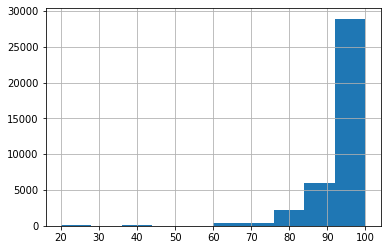

In [282]:
#rartings, price 
#do not to outlier removal for bound variables
df['review_scores_rating'].hist()

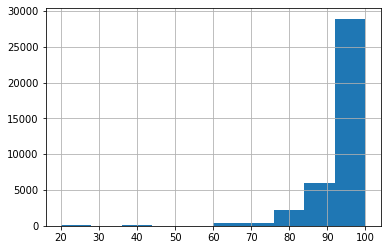

In [306]:
df['review_scores_rating'].hist()

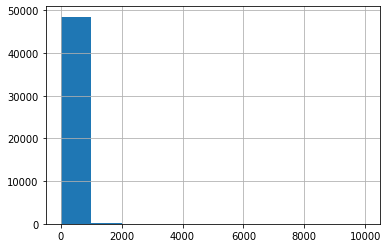

In [307]:
df['price'].hist()

In [308]:
q = df["price"].quantile(0.95)
df['price'] = df[df["price"] < q]

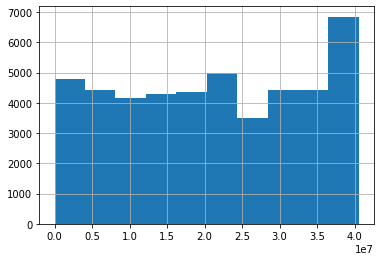

In [309]:
df['price'].hist()

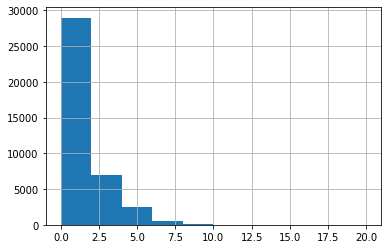

In [310]:
df['reviews_per_month'].hist()

In [311]:
q = df['reviews_per_month'].quantile(0.95)
df['reviews_per_month'] = df[df['reviews_per_month'] < q]

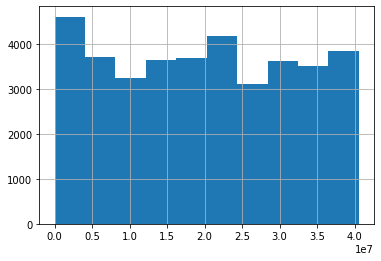

In [312]:
df['reviews_per_month'].hist()

In [288]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.030
Model:                              OLS   Adj. R-squared:                  0.029
Method:                   Least Squares   F-statistic:                     40.09
Date:                  Tue, 14 Jan 2020   Prob (F-statistic):          1.44e-222
Time:                          11:41:03   Log-Likelihood:            -1.3395e+05
No. Observations:                 37668   AIC:                         2.680e+05
Df Residuals:                     37638   BIC:                         2.682e+05
Df Model:                            29                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 50.0232      0.220    227.886      0.000      49.593      50.453
host_listings_count        0.0011      0.001      1.312      0.190      -0.001       0.003
accommodates              -0.3937      0.042     -9.296      0.000      -0.477      -0.311
bathrooms                 -0.2570      0.121     -2.121      0.034      -0.494      -0.019
bedrooms                   0.6269      0.087      7.202      0.000       0.456       0.798
beds                      -0.2118      0.062     -3.419      0.001      -0.333      -0.090
price                      0.0020      0.000      7.851      0.000       0.001       0.002
availability_365          -0.0060      0.000    -17.258      0.000      -0.007      -0.005
minimum_minimum_nights     0.0056      0.005      1.119      0.263      -0.004       0.015
maximum_minimum_nights     0.0095      0.012      0.809      0.419      -0.013       0.032
minimum_maximum_nights    -0.0007      0.002     -0.320      0.749      -0.005       0.004
maximum_maximum_nights     0.0126      0.011      1.149      0.251      -0.009       0.034
minimum_nights_avg_ntm    -0.0239      0.014     -1.660      0.097      -0.052       0.004
maximum_nights_avg_ntm    -0.0119      0.012     -0.964      0.335      -0.036       0.012
reviews_per_month          0.3792      0.028     13.664      0.000       0.325       0.434
Apartment                  7.8158      0.182     43.053      0.000       7.460       8.172
Condominium                9.3358      0.268     34.899      0.000       8.811       9.860
House                      7.4417      0.220     33.864      0.000       7.011       7.872
Loft                       9.1779      0.272     33.772      0.000       8.645       9.711
Other                      7.5880      0.889      8.536      0.000       5.846       9.330
Townhouse                  8.6639      0.260     33.319      0.000       8.154       9.174
Entire_home_apt           18.4824      0.135    136.963      0.000      18.218      18.747
Private_room              16.8281      0.127    132.700      0.000      16.580      17.077
Shared_room               14.7127      0.222     66.311      0.000      14.278      15.148
Airbed                     8.7722      0.691     12.690      0.000       7.417      10.127
Couch                     11.3784      1.019     11.164      0.000       9.381      13.376
Futon                      9.0759      0.545     16.661      0.000       8.008      10.144
Pull_out_Sofa             11.2220      0.574     19.561      0.000      10.098      12.346
Real_Bed                   9.5747      0.308     31.117      0.000       8.972      10.178
borough_Bronx              9.6516      0.254     37.990      0.000       9.154      10.150
borough_Brooklyn          10.0682      0.130     77.384   

In [292]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     147.0
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        11:42:34   Log-Likelihood:                -70043.
No. Observations:               37593   AIC:                         1.402e+05
Df Residuals:                   37557   BIC:                         1.405e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9415      0.081    -11.637      0.000      -1.100      -0.783
host_listings_count            -0.0016      0.000     -9.719      0.000      -0.002      -0.001
accommodates                    0.1800      0.008     23.204      0.000       0.165       0.195
bathrooms                      -0.1710      0.022     -7.664      0.000      -0.215      -0.127
bedrooms                       -0.1759      0.016    -10.983      0.000      -0.207      -0.145
beds                            0.0439      0.011      3.850      0.000       0.022       0.066
price                          -0.0004   4.61e-05     -9.099      0.000      -0.001      -0.000
availability_365                0.0021   6.41e-05     32.527      0.000       0.002       0.002
minimum_minimum_nights         -0.0100      0.001    -10.911      0.000      -0.012      -0.008
maximum_minimum_nights          0.0019      0.002      0.872      0.383      -0.002       0.006
minimum_maximum_nights         -0.0005      0.000     -1.095      0.274      -0.001       0.000
maximum_maximum_nights          0.0071      0.002      3.489      0.000       0.003       0.011
minimum_nights_avg_ntm         -0.0028      0.003     -1.063      0.288      -0.008       0.002
maximum_nights_avg_ntm         -0.0066      0.002     -2.906      0.004      -0.011      -0.002
review_scores_rating           -0.0229      0.002    -11.828      0.000      -0.027      -0.019
review_scores_accuracy          0.1061      0.016      6.654      0.000       0.075       0.137
review_scores_cleanliness       0.1793      0.011     16.039      0.000       0.157       0.201
review_scores_checkin           0.0623      0.016      3.926      0.000       0.031       0.093
review_scores_communication     0.0271      0.017      1.607      0.108      -0.006       0.060
review_scores_location          0.0905      0.013      7.020      0.000       0.065       0.116
review_scores_value             0.0403      0.015      2.707      0.007       0.011       0.069
Apartment                      -0.1044      0.035     -2.955      0.003      -0.174      -0.035
Condominium                     0.0046      0.051      0.091      0.927      -0.095       0.104
House                           0.1440      0.042      3.437      0.001       0.062       0.226
Loft                           -0.2415      0.052     -4.680      0.000      -0.343      -0.140
Other                          -0.9726      0.164     -5.934      0.000      -1.294      -0.651
Townhouse                       0.2284      0.049      4.626      0.000       0.132       0.325
Entire_home_apt                -0.5402      0.035    -15.285      0.000      -0.609      -0.471
Private_room                   -0.1890      0.033     -5.682      0.000      -0.254      -0.124
Shared_room

In [368]:

df['review_scores_rating'] = df['review_scores_rating'].apply(np.log)

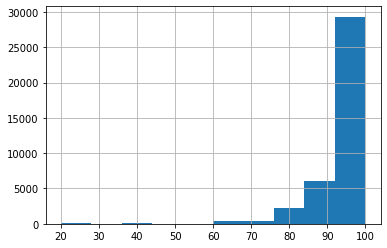

In [345]:
df['review_scores_rating'].hist()

In [375]:
#regression with log corrected ratings, a little higher but not significant
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.043
Model:                              OLS   Adj. R-squared:                  0.037
Method:                   Least Squares   F-statistic:                     7.125
Date:                  Tue, 14 Jan 2020   Prob (F-statistic):          1.72e-209
Time:                          12:56:27   Log-Likelihood:                 25289.
No. Observations:                 37884   AIC:                        -5.011e+04
Df Residuals:                     37648   BIC:                        -4.809e+04
Df Model:                           235                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -10.8489      5.649     -1.921      0.055     -21.921       0.223
zipcode[T. 11374]          0.0384      0.176      0.218      0.827      -0.307       0.384
zipcode[T.07093]          -0.0738      0.182     -0.405      0.685      -0.431       0.283
zipcode[T.10001]           0.0052      0.133      0.039      0.969      -0.256       0.266
zipcode[T.10002]           0.0313      0.133      0.235      0.814      -0.230       0.293
zipcode[T.10002-2289]  -1.268e-07   6.59e-08     -1.922      0.055   -2.56e-07     2.5e-09
zipcode[T.10003]           0.0345      0.133      0.259      0.796      -0.227       0.296
zipcode[T.10004]           0.0482      0.135      0.357      0.721      -0.216       0.313
zipcode[T.10005]           0.0448      0.134      0.335      0.738      -0.217       0.307
zipcode[T.10006]          -0.0234      0.134     -0.174      0.862      -0.287       0.240
zipcode[T.10007]           0.0455      0.136      0.336      0.737      -0.220       0.312
zipcode[T.10009]           0.0339      0.133      0.254      0.799      -0.227       0.295
zipcode[T.10010]           0.0282      0.133      0.211      0.833      -0.233       0.289
zipcode[T.10011]           0.0326      0.133      0.245      0.807      -0.228       0.294
zipcode[T.10012]           0.0361      0.133      0.271      0.786      -0.225       0.297
zipcode[T.10013]           0.0340      0.133      0.255      0.799      -0.228       0.296
zipcode[T.10014]           0.0408      0.133      0.306      0.760      -0.220       0.302
zipcode[T.10016]           0.0095      0.133      0.071      0.943      -0.251       0.270
zipcode[T.10017]           0.0428      0.133      0.321      0.748      -0.219       0.304
zipcode[T.10018]          -0.0179      0.133     -0.134      0.893      -0.279       0.243
zipcode[T.10019]           0.0271      0.133      0.204      0.838      -0.234       0.288
zipcode[T.10021]           0.0328      0.133      0.246      0.806      -0.228       0.294
zipcode[T.10022]           0.0155      0.133      0.117      0.907      -0.245       0.277
zipcode[T.10023]           0.0296      0.133      0.222      0.824      -0.231       0.290
zipcode[T.10024]           0.0342      0.133      0.257      0.797      -0.227       0.295
zipcode[T.10025]           0.0069      0.133      0.052      0.959      -0.254       0.267
zipcode[T.10026]           0.0307      0.133      0.231      0.818      -0.230       0.292
zipcode[T.10027]           0.0318      0.133      0.239      0.811      -0.229       0.293
zipcode[T.10028]           0.0146      0.133      0.110      0.912      -0.246       0.276
zipcode[T.10029]           0.0104      0.133      0.078      0.938      -0.250       0.271
zipcode[T.10030]           0.0269      0.133      0.202   

In [372]:
NY_cont = df[['host_listings_count','zipcode','latitude',
 'longitude','accommodates','bathrooms','bedrooms',
 'beds','price', 'availability_365', 'minimum_minimum_nights', 'maximum_minimum_nights',
 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy',
 'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
 'review_scores_location','review_scores_value','reviews_per_month' ]]

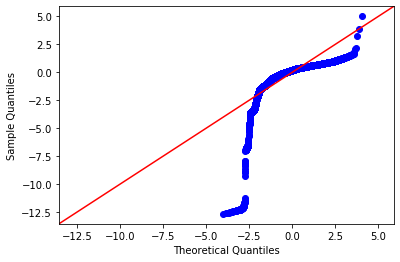

In [380]:
#residual plot of log(ratings)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [1]:
df_c

NameError: name 'df_c' is not defined